In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate 
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc.adia_analysis import *
from toolfunc.pulse_filter import *
import scipy.optimize as sci_op
from toolfunc import DE

In [2]:
detuning_var = np.arange(-200e6,200.1e6,10e6)
anhar_var = np.arange(-100e6,100.1e6,5e6)
r_var= np.append(np.append(np.arange(-0.5,-0.2,0.02),np.arange(-0.2,0.2,0.01)),np.arange(0.2,0.501,0.02))
error_d_wc = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_wc.txt')
error_d_w1 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_w1.txt')
error_d_w2 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_w2.txt')

error_r1c = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_r1c.txt')
error_r2c = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_r2c.txt')
error_r12 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_r12.txt')

error_d_alpha1 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_alpha1.txt')
error_d_alpha2 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_alpha2.txt')
error_d_alphac = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_deviation\error_d_alphac.txt')

In [12]:
fig=plt.figure(figsize=[8.4,2.6])
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
lw=2.5
ax1.plot(detuning_var/1e6,error_d_wc,'tab:red',linewidth=lw)
ax1.plot(detuning_var/1e6,error_d_w1,'tab:blue',linewidth=lw)
ax1.plot(detuning_var/1e6,error_d_w2,'tab:green',linewidth=lw)

ax2.plot(r_var,error_r1c,'tab:blue',linewidth=lw)
ax2.plot(r_var,error_r2c,'tab:green',linewidth=lw)
ax2.plot(r_var,error_r12,'tab:red',linewidth=lw)

ax3.plot(anhar_var/1e6,error_d_alpha1,'tab:blue',linewidth=lw)
ax3.plot(anhar_var/1e6,error_d_alpha2,'tab:green',linewidth=lw)
ax3.plot(anhar_var/1e6,error_d_alphac,'tab:red',linewidth=lw)


ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylim([3e-6,4e-3])
ax2.set_ylim([3e-6,4e-3])
ax3.set_ylim([3e-6,4e-3])

ax1.set_xlim([-220,220])
ax2.set_xlim([-0.55,0.55])
ax3.set_xlim([-110,110])


ax1.tick_params(axis='x',which='both',bottom=True,top=True,direction='in')
ax1.tick_params(axis='y',which='both',left=True,right=True,direction='in')
ax2.tick_params(axis='x',which='both',bottom=True,top=True,direction='in')
ax2.tick_params(axis='y',which='both',left=True,right=True,direction='in')
ax3.tick_params(axis='x',which='both',bottom=True,top=True,direction='in')
ax3.tick_params(axis='y',which='both',left=True,right=True,direction='in')


ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax3.tick_params(labelsize=14)

ax2.set(yticklabels=[])
ax3.set(yticklabels=[])

[[]]

In [4]:
%matplotlib qt

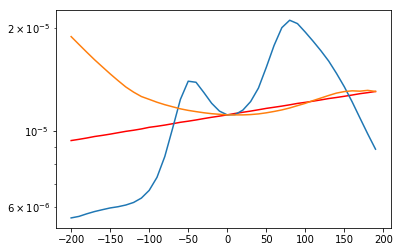

In [113]:
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(detuning[0:len(error_d_r12)]/1e6,error_d_r12,'r')
ax.plot(detuning[0:len(error_d_r1c)]/1e6,error_d_r1c)
ax.plot(detuning[0:len(error_d_r2c)]/1e6,error_d_r2c)
ax.set_yscale('log')

In [101]:
np.append(np.arange(-0.5,-0.2,0.02),np.arange(0.2,0.501,0.02))

array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
       -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ])

In [100]:
np.arange(0.2,0.501,0.02)

array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ,
       0.42, 0.44, 0.46, 0.48, 0.5 ])

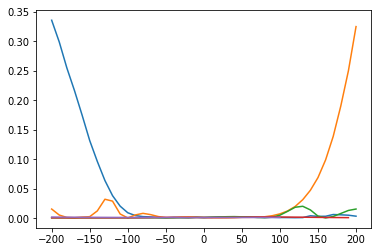

In [67]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(detuning/1e6,error_d_wc*100)
ax.plot(detuning[0:len(error_d_w1)]/1e6,error_d_w1*100)
ax.plot(detuning[0:len(error_d_w2)]/1e6,error_d_w2*100)
ax.plot(detuning[0:len(error_d_r1c)]/1e6,error_d_r1c*100)
ax.plot(detuning[0:len(error_d_r2c)]/1e6,error_d_r2c*100)
# ax.set_yscale('log')